In [1]:
import torch
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

In [2]:
def get_data(batch_size=16):
    x = torch.rand(batch_size, 1) * 5
    y = x * 2 + 3 + torch.randn(batch_size, 1)
    return x, y

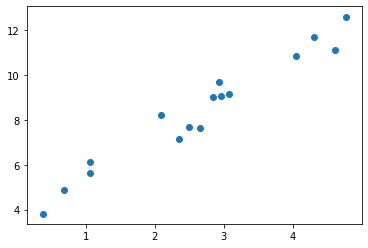

In [3]:
x, y = get_data()
plt.scatter(x.numpy(), y.numpy())

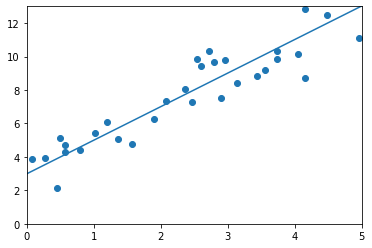

In [4]:
w = torch.rand(1, 1)
b = torch.zeros(1, 1)

lr = 0.01

for i in range(1000):
    x, y = get_data()
    
    # forward
    y_pred = x.mm(w) + b
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.mean()

    # backward
    dw = x.t().mm(y_pred - y) 
    db = (y_pred - y).sum()

    w.sub_(dw * lr)
    b.sub_(db * lr)
    
    # plot
    if i % 50 == 0:
        display.clear_output(wait=True)
        x = torch.arange(0, 6).view(-1, 1)
        y = x.float().mm(w) + b
        plt.plot(x.numpy(), y.numpy())
        
        x1, y1 = get_data(32)
        plt.scatter(x1.numpy(), y1.numpy())
        
        plt.xlim(0, 5)
        plt.ylim(0, 13)
        plt.show()
        plt.pause(0.5)

In [5]:
w.item(), b.item()

(2.173053741455078, 2.945833683013916)